Q1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

In [2]:
# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

# Step 3: Assign it to a variable called users
users = pd.read_csv(url, sep='|')

# Step 4: Discover the mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()

# Step 5: Discover the Male ratio per occupation and sort it from the most to the least
def male_ratio(group):
    male_count = (group['gender'] == 'M').sum()
    total_count = group['gender'].count()
    return male_count / total_count

male_ratio_per_occupation = users.groupby('occupation').apply(male_ratio)
sorted_male_ratio = male_ratio_per_occupation.sort_values(ascending=False)

# Step 6: For each occupation, calculate the minimum and maximum ages
age_range_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

# Step 7: For each combination of occupation and sex, calculate the mean age
mean_age_per_combination = users.groupby(['occupation', 'gender'])['age'].mean()

# Step 8: For each occupation, present the percentage of women and men
def gender_percentage(group):
    total_count = group['gender'].count()
    female_count = (group['gender'] == 'F').sum()
    male_count = (group['gender'] == 'M').sum()
    female_percentage = (female_count / total_count) * 100
    male_percentage = (male_count / total_count) * 100
    return pd.Series({'Female Percentage': female_percentage, 'Male Percentage': male_percentage})

gender_percentage_per_occupation = users.groupby('occupation').apply(gender_percentage)

# Print or display the results for each step
print("Step 4: Mean Age per Occupation:")
print(mean_age_per_occupation)

print("\nStep 5: Male Ratio per Occupation (Sorted):")
print(sorted_male_ratio)

print("\nStep 6: Age Range per Occupation:")
print(age_range_per_occupation)

print("\nStep 7: Mean Age per Occupation and Sex:")
print(mean_age_per_combination)

print("\nStep 8: Gender Percentage per Occupation:")
print(gender_percentage_per_occupation)


Step 4: Mean Age per Occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Step 5: Male Ratio per Occupation (Sorted):
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.69

Question 2
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goals
Step 11. Select the teams that start with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [5]:
# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

# Step 3: Assign it to a variable called euro12
euro12 = pd.read_csv(url)

# Step 4: Select only the Goal column
goals = euro12['Goals']

# Step 5: How many teams participated in Euro2012?
num_teams = euro12['Team'].nunique()

# Step 6: What is the number of columns in the dataset?
num_columns = euro12.shape[1]

# Step 7: View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

# Step 8: Sort the teams by Red Cards, then by Yellow Cards
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])

# Step 9: Calculate the mean Yellow Cards given per Team
mean_yellow_cards_per_team = euro12.groupby('Team')['Yellow Cards'].mean()

# Step 10: Filter teams that scored more than 6 goals
teams_with_more_than_6_goals = euro12[euro12['Goals'] > 6]

# Step 11: Select the teams that start with G
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]

# Step 12: Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]

# Step 13: Select all columns except the last 3
columns_except_last_3 = euro12.iloc[:, :-3]

# Step 14: Present only the Shooting Accuracy from England, Italy, and Russia
shooting_accuracy_selected_teams = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]

# Print or display the results for each step
print("Number of teams:", num_teams)
print("Number of columns:", num_columns)

print("\nDiscipline (Team, Yellow Cards, Red Cards):")
print(discipline)

print("\nTeams sorted by Red Cards, then Yellow Cards:")
print(discipline_sorted)

print("\nMean Yellow Cards per Team:")
print(mean_yellow_cards_per_team)

print("\nTeams with more than 6 goals:")
print(teams_with_more_than_6_goals)

print("\nTeams starting with 'G':")
print(teams_starting_with_G)

print("\nFirst 7 columns:")
print(first_7_columns)

print("\nColumns except the last 3:")
print(columns_except_last_3)

print("\nShooting Accuracy for England, Italy, and Russia:")
print(shooting_accuracy_selected_teams)


Number of teams: 16
Number of columns: 35

Discipline (Team, Yellow Cards, Red Cards):
                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0

Teams sorted by Red Cards, then Yellow Cards:
                   Team  Yellow C

Question 3
Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299


In [6]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np

# Step 2: Create 3 different Series
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

# Step 3: Create a DataFrame by joining the Series by column
data = pd.concat([series1, series2, series3], axis=1)

# Step 4: Change the name of the columns
data.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5: Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.DataFrame(pd.concat([series1, series2, series3]))

# Step 6: Check if it goes only until index 99
print(bigcolumn.index.max())  # This will print 99 if the index only goes up to 99

# Step 7: Reindex the DataFrame to go from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)

# Print the DataFrame after completing each step
print("DataFrame with 3 Series:")
print(data)

print("\nOne column DataFrame 'bigcolumn':")
print(bigcolumn)


99
DataFrame with 3 Series:
    bedrs  bathrs  price_sqr_meter
0       4       2            15363
1       1       1            12933
2       4       3            27119
3       2       1            18398
4       3       3            28296
..    ...     ...              ...
95      1       2            17995
96      3       2            19958
97      3       1            17118
98      4       3            21738
99      1       2            25654

[100 rows x 3 columns]

One column DataFrame 'bigcolumn':
         0
0        4
1        1
2        4
3        2
4        3
..     ...
295  17995
296  19958
297  17118
298  21738
299  25654

[300 rows x 1 columns]


Question 4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.


In [10]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np

# Step 2: Import the dataset
data_path = "C:\\Users\\serae\\OneDrive\\Masaüstü\\COURSES\\BDAT1004 - Data Programming\\assignments\\ProblemSet3\\wind.txt"
data = pd.read_csv(data_path, sep="\s+", parse_dates=[[0, 1, 2]])

# Step 3: Assign it to a variable called data
data.columns = ["date", "RPT", "VAL", "ROS", "KIL", "SHA", "BIR", "DUB", "CLA", "MUL", "CLO", "BEL", "MAL"]

# Step 4: Function to fix the year 2061
def fix_year(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return pd.Timestamp(year, x.month, x.day)

data['date'] = data['date'].apply(fix_year)

# Step 5: Set the right dates as the index
data.set_index('date', inplace=True)

# Step 6: Count missing values for each location
missing_values = data.isnull().sum()

# Step 7: Count non-missing values in total
total_non_missing = data.count().sum()

# Step 8: Calculate the mean windspeed over all locations and times
mean_windspeed = data.mean().mean()

# Step 9: Create loc_stats DataFrame
loc_stats = pd.DataFrame()
loc_stats['min'] = data.min()
loc_stats['max'] = data.max()
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()

# Step 10: Create day_stats DataFrame
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)

# Step 11: Find average windspeed in January for each location
january_avg = data[data.index.month == 1].mean()

# Step 12: Downsample to yearly frequency
yearly_data = data.resample('Y').mean()

# Step 13: Downsample to monthly frequency
monthly_data = data.resample('M').mean()

# Step 14: Downsample to weekly frequency
weekly_data = data.resample('W').mean()

# Step 15: Calculate min, max, mean, and std for first 52 weeks
weekly_stats = weekly_data[:52].agg(['min', 'max', 'mean', 'std'])

# Print or display the results for each step
print("Missing values for each location:")
print(missing_values)

print("\nTotal non-missing values in the dataset:", total_non_missing)

print("\nMean windspeed over all locations and times:", mean_windspeed)

print("\nLocation statistics:")
print(loc_stats)

print("\nDay statistics:")
print(day_stats)

print("\nAverage windspeed in January for each location:")
print(january_avg)

print("\nYearly data:")
print(yearly_data)

print("\nMonthly data:")
print(monthly_data)

print("\nWeekly data (first 52 weeks) statistics:")
print(weekly_stats)


Missing values for each location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Total non-missing values in the dataset: 78857

Mean windspeed over all locations and times: 10.227982360836938

Location statistics:
      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794

Day statistics:
             min    max       mean       std
date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  1

Question 5
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [11]:
# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

# Step 3: Assign it to a variable called chipo

# Step 4: See the first 10 entries
print(chipo.head(10))

# Step 5: Number of observations in the dataset
num_observations = chipo.shape[0]

# Step 6: Number of columns in the dataset
num_columns = chipo.shape[1]

# Step 7: Print the name of all the columns
print("Column names:")
print(chipo.columns)

# Step 8: How is the dataset indexed?
print("Index:")
print(chipo.index)

# Step 9: Most-ordered item
most_ordered_item = chipo['item_name'].value_counts().idxmax()

# Step 10: Number of items ordered for the most-ordered item
most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()

# Step 11: Most ordered item in the choice_description column
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()

# Step 12: Total number of items ordered
total_items_ordered = chipo['quantity'].sum()

# Step 13: Turn item price into a float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

# Step 14: Calculate revenue for the period
revenue = (chipo['quantity'] * chipo['item_price']).sum()

# Step 15: Number of orders made in the period
num_orders = chipo['order_id'].nunique()

# Step 16: Calculate average revenue amount per order
average_revenue_per_order = revenue / num_orders

# Step 17: Number of different items sold
num_different_items = chipo['item_name'].nunique()

# Print the results for each step
print("\nNumber of observations:", num_observations)
print("Number of columns:", num_columns)
print("Most ordered item:", most_ordered_item)
print("Number of items ordered for the most ordered item:", most_ordered_item_count)
print("Most ordered choice in choice_description column:", most_ordered_choice)
print("Total number of items ordered:", total_items_ordered)
print("\nData type of item_price column:", chipo['item_price'].dtype)
print("\nTotal revenue for the period:", revenue)
print("Number of orders made in the period:", num_orders)
print("Average revenue amount per order:", average_revenue_per_order)
print("Number of different items sold:", num_different_items)


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!


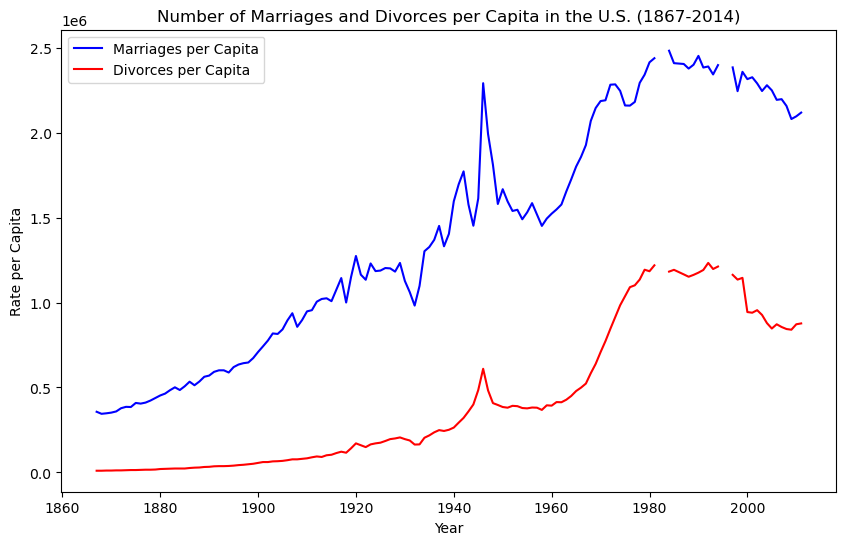

In [19]:
# Step 1: Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Import the dataset
data_path = "C:\\Users\\serae\\OneDrive\\Masaüstü\\COURSES\\BDAT1004 - Data Programming\\assignments\\ProblemSet3\\us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(data_path)

# Step 3: Create a line plot
plt.figure(figsize=(10, 6))

plt.plot(data['Year'], data['Marriages'], label='Marriages per Capita', color='blue')
plt.plot(data['Year'], data['Divorces'], label='Divorces per Capita', color='red')

# Step 4: Label axes and add legend
plt.xlabel('Year')
plt.ylabel('Rate per Capita')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()

# Step 5: Show the plot
plt.show()


Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

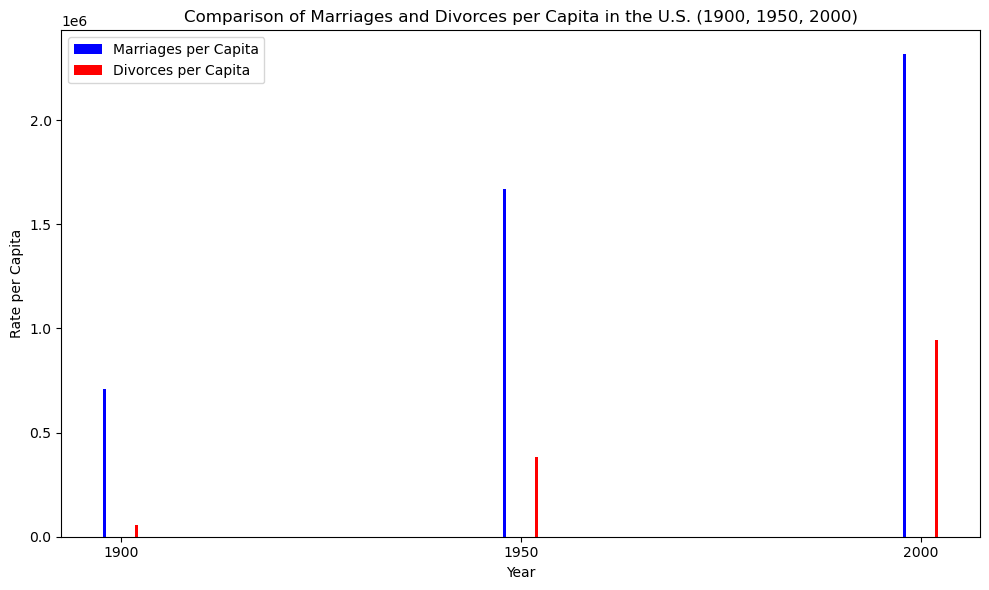

In [20]:
# Step 1: Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Import the dataset
data_path = "C:\\Users\\serae\\OneDrive\\Masaüstü\\COURSES\\BDAT1004 - Data Programming\\assignments\\ProblemSet3\\us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(data_path)

# Step 3: Filter data for the years 1900, 1950, and 2000
selected_years = [1900, 1950, 2000]
selected_data = data[data['Year'].isin(selected_years)]

# Step 4: Create a vertical bar chart
plt.figure(figsize=(10, 6))

plt.bar(selected_data['Year'] - 2, selected_data['Marriages'], width=0.4, label='Marriages per Capita', color='blue')
plt.bar(selected_data['Year'] + 2, selected_data['Divorces'], width=0.4, label='Divorces per Capita', color='red')

# Step 5: Label axes and add legend
plt.xlabel('Year')
plt.ylabel('Rate per Capita')
plt.title('Comparison of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xticks(selected_data['Year'], selected_years)
plt.legend()

# Step 6: Show the plot
plt.tight_layout()
plt.show()


Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!


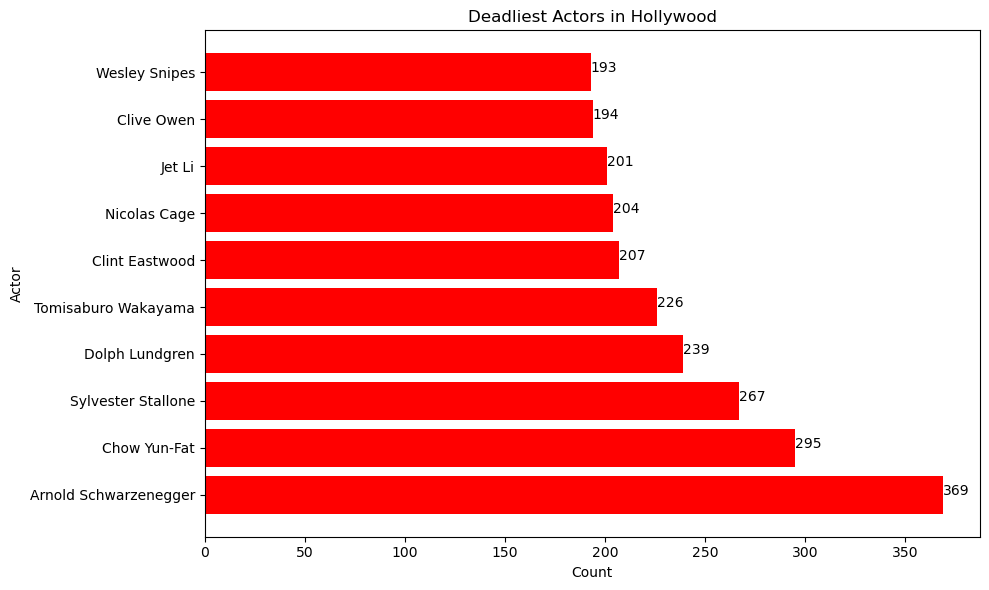

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import the dataset
data_path = "C:\\Users\\serae\\OneDrive\\Masaüstü\\COURSES\\BDAT1004 - Data Programming\\assignments\\ProblemSet3\\actor_kill_counts.csv"
df = pd.read_csv(data_path)

# Step 2: Sort the DataFrame by 'Kill Count' in descending order
df = df.sort_values(by='Count', ascending=False)

# Step 3: Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['Actor'], df['Count'], color='red')

# Step 4: Label axes and title
plt.xlabel('Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# Step 5: Add labels for each bar
for index, value in enumerate(df['Count']):
    plt.text(value, index, str(value))

# Step 6: Show the plot
plt.tight_layout()
plt.show()


Question 9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.


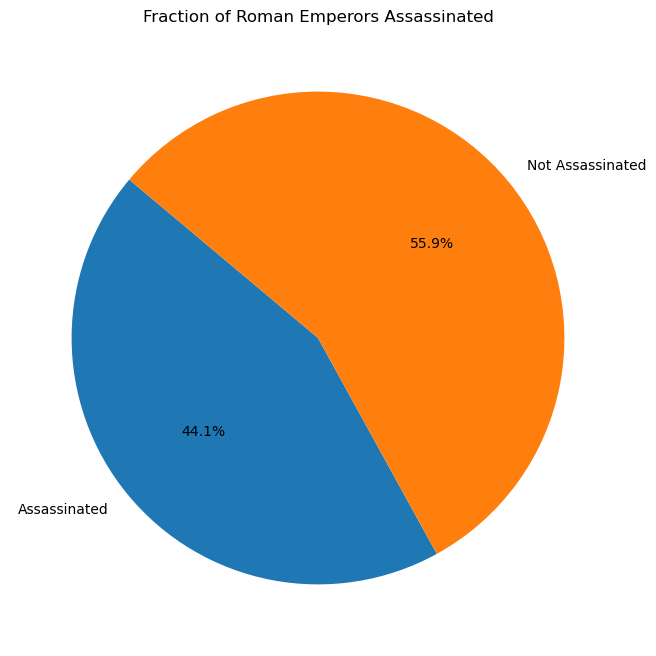

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import the dataset
data_path = r"C:\Users\serae\OneDrive\Masaüstü\COURSES\BDAT1004 - Data Programming\assignments\ProblemSet3\roman-emperor-reigns.csv"
df = pd.read_csv(data_path)

# Step 2: Calculate the number of assassinated emperors
assassinated_count = df['Cause_of_Death'].str.contains('assassinated', case=False).sum()

# Step 3: Calculate the total number of emperors
total_emperors = len(df)

# Step 4: Calculate the fraction of assassinated emperors
fraction_assassinated = assassinated_count / total_emperors

# Step 5: Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie([fraction_assassinated, 1 - fraction_assassinated],
        labels=['Assassinated', 'Not Assassinated'],
        autopct='%1.1f%%', startangle=140)
plt.title('Fraction of Roman Emperors Assassinated')

# Step 6: Show the plot
plt.show()


Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

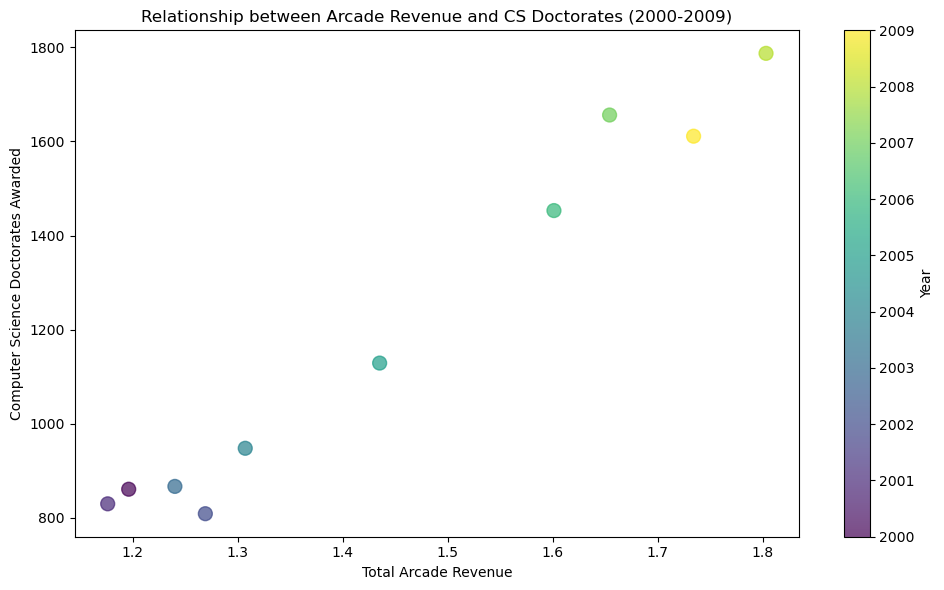

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import the dataset
data_path = r"C:\Users\serae\OneDrive\Masaüstü\COURSES\BDAT1004 - Data Programming\assignments\ProblemSet3\arcade-revenue-vs-cs-doctorates.csv"
df = pd.read_csv(data_path)

# Step 2: Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Total Arcade Revenue (billions)'], df['Computer Science Doctorates Awarded (US)'], c=df['Year'], cmap='viridis', s=100, alpha=0.7)

# Step 3: Label axes and title
plt.xlabel('Total Arcade Revenue')
plt.ylabel('Computer Science Doctorates Awarded')
plt.title('Relationship between Arcade Revenue and CS Doctorates (2000-2009)')
plt.colorbar(label='Year')

# Step 4: Show the plot
plt.tight_layout()
plt.show()
